In [1]:
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import sys
from scipy.stats import gaussian_kde
import os


In [3]:
print(sys.version)

print(sc.__version__)
print(pd.__version__)
print(sns.__version__)
print(matplotlib.__version__)
print(np.__version__)

3.9.20 | packaged by conda-forge | (main, Sep 30 2024, 17:49:10) 
[GCC 13.3.0]
1.10.3
2.2.3
0.13.2
3.6.3
1.26.4


In [4]:
adata = sc.read_h5ad("/data/Kramann_lab/From_Leon/3CA_anndatas/human_skin_ts_after_batcheffect_corrected.h5ad")

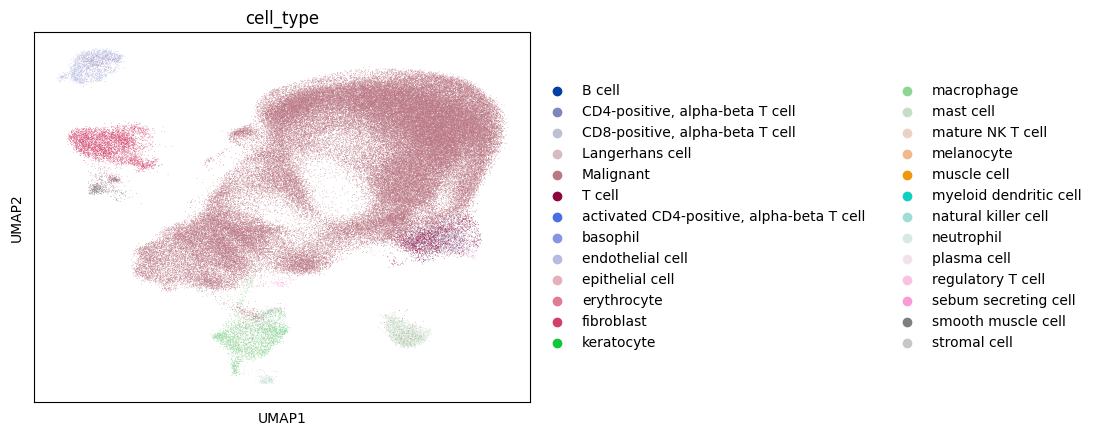

In [5]:
sc.pl.umap(adata, color="cell_type")

In [25]:
adata.obs.columns

Index(['donor_id', 'tissue_in_publication', 'anatomical_position', 'method',
       'cdna_plate', 'library_plate', 'notes', 'cdna_well',
       'assay_ontology_term_id', 'sample_id', 'replicate', '10X_run',
       'ambient_removal', 'donor_method', 'donor_assay', 'donor_tissue',
       'donor_tissue_assay', 'cell_type_ontology_term_id', 'compartment',
       'broad_cell_class', 'free_annotation', 'manually_annotated',
       'published_2022', 'n_genes_by_counts', 'total_counts',
       'total_counts_mt', 'pct_counts_mt', 'total_counts_ercc',
       'pct_counts_ercc', '_scvi_batch', '_scvi_labels',
       'scvi_leiden_donorassay_full', 'ethnicity_original',
       'scvi_leiden_res05_tissue', 'sample_number',
       'organism_ontology_term_id', 'suspension_type', 'tissue_type',
       'disease_ontology_term_id', 'is_primary_data',
       'tissue_ontology_term_id', 'sex_ontology_term_id',
       'self_reported_ethnicity_ontology_term_id',
       'development_stage_ontology_term_id', 'cell

In [26]:
adata.obs.file_id

TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPos_F11-0         NaN
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPos_D7-0          NaN
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinNeg_N13-0         NaN
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPos_D6-0          NaN
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPos_A16-0         NaN
                                                            ...   
40015-4-1                                                 BCC.h5ad
40016-4-1                                                 BCC.h5ad
49100-4-1                                                 BCC.h5ad
49145-4-1                                                 BCC.h5ad
49681-4-1                                                 BCC.h5ad
Name: file_id, Length: 136744, dtype: category
Categories (5, object): ['BCC.h5ad', 'Data_Biermann2022_Skin.h5ad', 'Data_Ji2020_Skin.h5ad', 'Data_Li2019_Skin.h5ad', 'Data_Paulson2020_Skin.h5ad']

In [38]:
print(adata[adata.obs.file_id != "TS"].obs.cell_type.unique())

['Malignant']
Categories (1, object): ['Malignant']


In [27]:
list(adata.obs.cell_type.unique())

['myeloid dendritic cell',
 'CD4-positive, alpha-beta T cell',
 'macrophage',
 'T cell',
 'CD8-positive, alpha-beta T cell',
 'mast cell',
 'basophil',
 'natural killer cell',
 'sebum secreting cell',
 'regulatory T cell',
 'fibroblast',
 'smooth muscle cell',
 'mature NK T cell',
 'endothelial cell',
 'melanocyte',
 'epithelial cell',
 'Langerhans cell',
 'plasma cell',
 'B cell',
 'activated CD4-positive, alpha-beta T cell',
 'stromal cell',
 'neutrophil',
 'keratocyte',
 'erythrocyte',
 'muscle cell',
 'Malignant']

In [34]:
list(adata.obs["sample"].unique())

['TSP2_Skin_Chest_SS2_B113707_B111658_ImmuneLineagePos',
 'TSP2_Skin_Chest_SS2_B113707_B111658_ImmuneLineageNeg',
 'TSP2_Skin_Abdomen_SS2_B113705_B111656_Stromal',
 'TSP2_Skin_Abdomen_SS2_B113705_B111656_Endothelial',
 'TSP2_Skin_Abdomen_SS2_B113705_B111656_Epithelial',
 'TSP10_Skin_Chest_SS2_B134176_B133829_ImmuneLineageNeg',
 'TSP10_Skin_Chest_SS2_B134176_B133829_ImmuneLineagePos',
 'TSP14_Skin_Abdomen_SS2_B115069_D102100_Myeloid',
 'TSP14_Skin_Abdomen_SS2_B115069_D102100_Lymphocytes',
 'TSP10_Skin_Chest_SS2_B134179_B133832_Epithelial',
 'TSP10_Skin_Chest_SS2_B134179_B133832_Stromal',
 'TSP2_Skin_Abdomen_SS2_B113445_B111657_ImmuneLineagePos',
 'TSP2_Skin_Abdomen_SS2_B113445_B111657_ImmuneLineageNeg',
 'TSP10_Skin_Abdomen_SS2_B134175_B133830_Stromal',
 'TSP10_Skin_Abdomen_SS2_B134175_B133830_Epithelial',
 'TSP14_Skin_Chest_SS2_B115070_D102106_Keratinocytes',
 'TSP14_Skin_Chest_SS2_B115070_D102106_Stromal',
 'TSP14_Skin_Abdomen_SS2_B134027_D102108_Stromal',
 'TSP14_Skin_Abdomen_SS2_B13

In [35]:
adata.obs[['batch', 'file_id']].drop_duplicates()

,batch,file_id
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPos_F11-0,0,TS
0-0-1,1,Data_Paulson2020_Skin.h5ad
989-1-1,1,Data_Li2019_Skin.h5ad
0-2-1,1,Data_Ji2020_Skin.h5ad
2-3-1,1,Data_Biermann2022_Skin.h5ad
10429-4-1,1,BCC.h5ad


In [4]:
tissue = "skin"
adata = sc.read_h5ad(f"/data/Kramann_lab/From_Leon/3CA_anndatas/human_{tissue}_ts_after_batcheffect_corrected.h5ad")

Malignant Peak Percentage: 2.79
Non-Malignant Peak Percentage: 2.49
Overlap Point Percentage: 64.81
GPNMB Malignant Percentage: 71.94
GPNMB Non-Malignant Percentage: 13.82


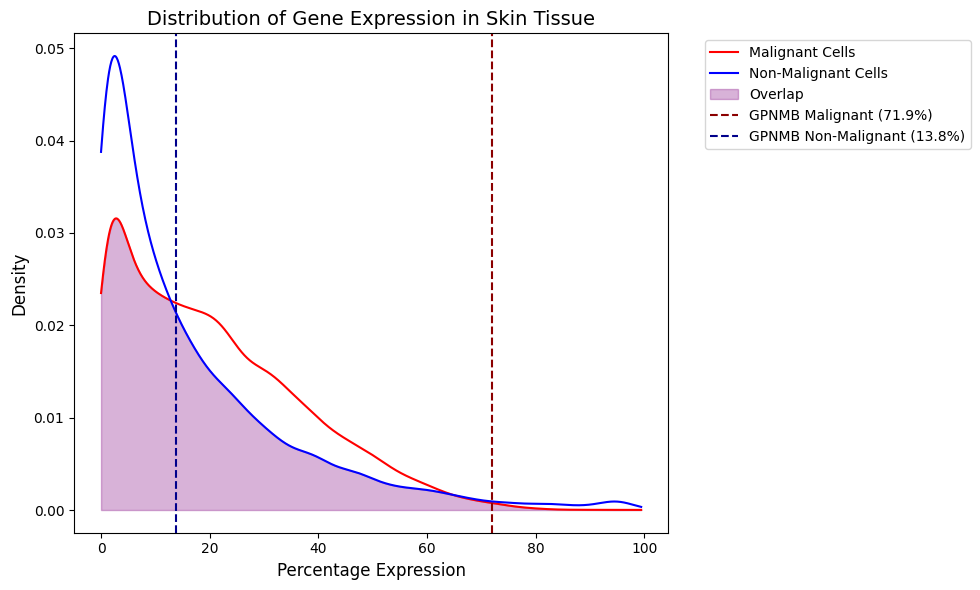

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

# Generate histograms
plt.figure(figsize=(10, 6))

# Get GPNMB values
gpnmb_malignant = results[results['Gene'] == 'GPNMB']['Malignant_Percent'].values[0]
gpnmb_non_malignant = results[results['Gene'] == 'GPNMB']['NonMalignant_Percent'].values[0]

# KDE for malignant
kde_malignant = gaussian_kde(expr_malignant)
x_range = np.linspace(min(expr_malignant.min(), expr_non_malignant.min()),
                      max(expr_malignant.max(), expr_non_malignant.max()), 1000)
y_malignant = kde_malignant(x_range)

# KDE for non-malignant
kde_non_malignant = gaussian_kde(expr_non_malignant)
y_non_malignant = kde_non_malignant(x_range)

# Plotting distributions
plt.plot(x_range, y_malignant, label="Malignant Cells", color="red")
plt.plot(x_range, y_non_malignant, label="Non-Malignant Cells", color="blue")

# Shade overlap
plt.fill_between(x_range, np.minimum(y_malignant, y_non_malignant), 
                 color='purple', alpha=0.3, label='Overlap')

# Add vertical lines for GPNMB values
plt.axvline(x=gpnmb_malignant, color='darkred', linestyle='--', 
            label=f'GPNMB Malignant ({gpnmb_malignant:.1f}%)')
plt.axvline(x=gpnmb_non_malignant, color='darkblue', linestyle='--', 
            label=f'GPNMB Non-Malignant ({gpnmb_non_malignant:.1f}%)')

# Labels and legend
plt.title(f"Distribution of Gene Expression in {tissue.capitalize()} Tissue", fontsize=14)
plt.xlabel("Percentage Expression", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Calculate peaks and overlap points
malignant_max = x_range[np.argmax(y_malignant)]
non_malignant_max = x_range[np.argmax(y_non_malignant)]
overlap_point = x_range[np.argmin(abs(y_malignant - y_non_malignant))]

# Print results
print(f"Malignant Peak Percentage: {malignant_max:.2f}")
print(f"Non-Malignant Peak Percentage: {non_malignant_max:.2f}")
print(f"Overlap Point Percentage: {overlap_point:.2f}")
print(f"GPNMB Malignant Percentage: {gpnmb_malignant:.2f}")
print(f"GPNMB Non-Malignant Percentage: {gpnmb_non_malignant:.2f}")

# Adjust layout to prevent legend cutoff
plt.tight_layout()
plt.show()


Processing skin...
                                                   batch  \
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPo...     0   
0-0-1                                                  1   
989-1-1                                                1   
0-2-1                                                  1   
2-3-1                                                  1   
10429-4-1                                              1   

                                                                        file_id  
TSP2_Skin_chest_SS2_B113707_B111658_ImmuneLinPo...                          NaN  
0-0-1                                                Data_Paulson2020_Skin.h5ad  
989-1-1                                                   Data_Li2019_Skin.h5ad  
0-2-1                                                     Data_Ji2020_Skin.h5ad  
2-3-1                                               Data_Biermann2022_Skin.h5ad  
10429-4-1                                                          

/data/ep924610/miniforge3/lib/python3.9/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


        Gene  Malignant_Percent  NonMalignant_Percent   Z_Score
0      GPNMB          79.850984             14.500169  3.538045
1       FMN1          81.785761             16.631058  3.534607
2  LINC00511          74.267555              9.631171  3.478116
3    TMEM117          69.555572              4.829641  3.465317
4      GPM6B          70.918434              7.151692  3.418105
5       SGCD          66.260741              2.293939  3.411539
6       BNC2          69.434824              5.779827  3.406441
7    ST3GAL6          72.325290             11.036770  3.288189
8      ERBB3          62.051407              1.399978  3.214877
9       FHIT          65.975251              5.954121  3.195218
['GPNMB', 'FMN1', 'LINC00511', 'TMEM117', 'GPM6B']
        Gene  Malignant_Percent  NonMalignant_Percent   Z_Score
0      GPNMB          79.850984             14.500169  3.538045
1       FMN1          81.785761             16.631058  3.534607
2  LINC00511          74.267555              9.631171

/tmp/ipykernel_1219027/1615780902.py:120: RuntimeWarning: invalid value encountered in scalar divide
  expr_malignant_percent = (adata[malignant_cells_patient].X[:, gene_idx] > 0).sum() / malignant_cells_patient.sum() * 100
/tmp/ipykernel_1219027/1615780902.py:121: RuntimeWarning: invalid value encountered in scalar divide
  expr_non_malignant_percent = (adata[non_malignant_cells_patient].X[:, gene_idx] > 0).sum() / non_malignant_cells_patient.sum() * 100
/tmp/ipykernel_1219027/1615780902.py:142: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.stripplot(
/tmp/ipykernel_1219027/1615780902.py:120: RuntimeWarning: invalid value encountered in scalar divide
  expr_malignant_percent = (adata[malignant_cells_patient].X[:, gene_idx] > 0).sum() / malignant_cells_patient.sum() * 100
/tmp/ipykernel_1219027/1615780902.py:121: RuntimeWarning: invalid val

KeyboardInterrupt: 

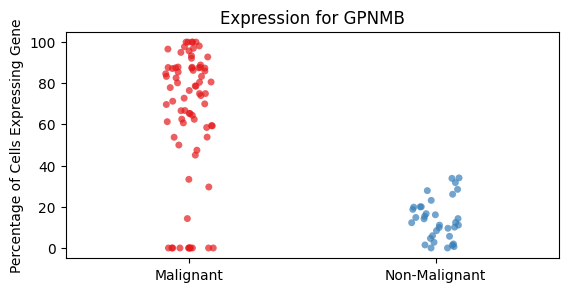

In [3]:
# Define tissues to process
tissues = ["skin", "breast", "crc", "kidney", "Liver", "ovary", "Pancreas", "head_neck"]  # Added head_and_neck
output_dir = "/data/ep924610/project_nb/paper_code/heatmap_results"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Dictionary to store top genes for each tissue
tissue_top_genes = {}
tissue_results = {}

for tissue in tissues:
    print(f"\nProcessing {tissue}...")
    adata = sc.read_h5ad(f"/data/Kramann_lab/From_Leon/3CA_anndatas/human_{tissue}_ts_after_batcheffect_corrected.h5ad")
    print(adata.obs[['batch', 'file_id']].drop_duplicates())
    if tissue == "skin":
        adata = adata[adata.obs.file_id != "Data_Paulson2020_Skin.h5ad"]
    sc.pp.normalize_total(adata, target_sum=1e6)
    # Define cell populations
    malignant_cells = adata.obs['cell_type'] == 'Malignant'
    #macrophage_cells = adata.obs['cell_type'] == 'macrophage'
    non_malignant_cells = (adata.obs['cell_type'] != 'Malignant')
    
    # Calculate expression percentages
    expr_malignant = (adata[malignant_cells].X > 0).sum(axis=0) / malignant_cells.sum() * 100
    expr_non_malignant = (adata[non_malignant_cells].X > 0).sum(axis=0) / non_malignant_cells.sum() * 100
    #expr_macro = (adata[macrophage_cells].X > 0).sum(axis=0) / macrophage_cells.sum() * 100
    
    # Convert to numpy arrays
    expr_malignant = np.array(expr_malignant).flatten()
    expr_non_malignant = np.array(expr_non_malignant).flatten()
    #expr_macro = np.array(expr_macro).flatten()
    
    # Calculate Z-score for expression in malignant and non-malignant cells
    expr_malignant_z = (expr_malignant - np.mean(expr_malignant)) / np.std(expr_malignant)
    expr_non_malignant_z = (expr_non_malignant - np.mean(expr_non_malignant)) / np.std(expr_non_malignant)
    
    # Calculate the enrichment score based on Z-scores
    enrichment_score_z = expr_malignant_z - expr_non_malignant_z

    
    # Create results DataFrame
    genes = adata.var.index
    results = pd.DataFrame({
        'Gene': genes,
        'Malignant_Percent': expr_malignant,
        'NonMalignant_Percent': expr_non_malignant,
        #'macro_percent': expr_macro,
        'Z_Score': enrichment_score_z
    })
    

    results = results.sort_values(by='Z_Score', ascending=False).reset_index(drop=True)

    print(results.head(10))
    
    # Generate histogram and get peak values
    plt.figure(figsize=(10, 6))
    
    kde_malignant = gaussian_kde(expr_malignant)
    x_range = np.linspace(min(expr_malignant.min(), expr_non_malignant.min()),
                          max(expr_malignant.max(), expr_non_malignant.max()), 1000)
    y_malignant = kde_malignant(x_range)
    
    kde_non_malignant = gaussian_kde(expr_non_malignant)
    y_non_malignant = kde_non_malignant(x_range)
    
    plt.plot(x_range, y_malignant, label="Malignant Cells", color="red")
    plt.plot(x_range, y_non_malignant, label="Non-Malignant Cells", color="blue")
    plt.fill_between(x_range, np.minimum(y_malignant, y_non_malignant), color='purple', alpha=0.3, label='Overlap')
    
    malignant_peak = x_range[np.argmax(y_malignant)]
    non_malignant_peak = x_range[np.argmax(y_non_malignant)]
    overlap_point = x_range[np.argmin(abs(y_malignant - y_non_malignant))]
    
    plt.title(f"Distribution of Gene Expression in {tissue.capitalize()} Tissue", fontsize=14)
    plt.xlabel("Percentage Expression", fontsize=12)
    plt.ylabel("Density", fontsize=12)
    plt.legend()
    plt.tight_layout()
    
    # Save histogram
    plt.savefig(os.path.join(output_dir, f"{tissue}_distribution.png"))
    plt.close()
    
    # Filter genes based on malignant peak percentage
    results = results[results['Malignant_Percent'] >= malignant_peak]
    results = results.sort_values(by='Z_Score', ascending=False).reset_index(drop=True)
    # Prepare heatmap data for top 5 genes
    top_genes = results.head(5)['Gene'].tolist()
    # top_genes.append("GPNMB")
    print(top_genes)
    print(results.head(5))
    if "GPNMB" in results["Gene"].unique():
        print(results[results["Gene"] == "GPNMB"])
    else:
        print("GPNMB is not in the dataset")        
    for mlana_name in ["MLANA", "MART-1", "MART1", "MALENA"]:
        if mlana_name in results["Gene"].unique():
            print(results[results["Gene"] == mlana_name])
        else:
            print(f"{mlana_name} is not in the dataset")   
    # Initialize a figure for subplots
    plt.figure(figsize=(14, 10))
    
    # Loop through the top 5 genes to create a plot for each
    for i, gene in enumerate(top_genes):
        # Get the index of the current gene in adata.var
        gene_idx = adata.var.index.get_loc(gene)
        
        # Create an empty list to store data for the plot
        data = []
        # Loop through each patient
        for patient in adata.obs['sample'].unique():
            # Malignant cells for this patient
            malignant_cells_patient = malignant_cells & (adata.obs['sample'] == patient)
            non_malignant_cells_patient = non_malignant_cells & (adata.obs['sample'] == patient)
            
            # Calculate the percentage of cells expressing the gene in malignant and non-malignant categories
            expr_malignant_percent = (adata[malignant_cells_patient].X[:, gene_idx] > 0).sum() / malignant_cells_patient.sum() * 100
            expr_non_malignant_percent = (adata[non_malignant_cells_patient].X[:, gene_idx] > 0).sum() / non_malignant_cells_patient.sum() * 100
            
            # Append data for this patient
            data.append({
                'Patient': patient,
                'Category': 'Malignant',
                'Expression_Percent': expr_malignant_percent
            })
            data.append({
                'Patient': patient,
                'Category': 'Non-Malignant',
                'Expression_Percent': expr_non_malignant_percent
            })
    
        # Convert the data list to a DataFrame
        combined_data = pd.DataFrame(data)
    
        # Create a subplot for the current gene
        plt.subplot(3, 2, i + 1)  # Create 3x2 grid, plot in ith position
        
        # Create the stripplot and store the returned plot object
        ax = sns.stripplot(
            data=combined_data,
            x='Category',
            y='Expression_Percent',
            jitter=True,
            #dodge=True,
            palette='Set1',
            alpha=0.7
        )
        
    
        # Find the top 3 highest percentage values for each category
        top_malignant = combined_data[combined_data['Category'] == 'Malignant'].nlargest(3, 'Expression_Percent')
        top_non_malignant = combined_data[combined_data['Category'] == 'Non-Malignant'].nlargest(3, 'Expression_Percent')
        
        # Get all points from the plot
        scatter_points = [child for child in ax.get_children() if isinstance(child, plt.matplotlib.collections.PathCollection)][0]
        points_coords = scatter_points.get_offsets()
        
        # Create separate lists of coordinates for each category
        malignant_coords = []
        non_malignant_coords = []
        
    
        
        # Title and labels
        plt.title(f"Expression for {gene}", fontsize=12)
        plt.ylabel("Percentage of Cells Expressing Gene")
        plt.xlabel("")
        
    # Adjust layout and display the plots
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{tissue}_per_patient.png"))
    plt.close()
    
    # Ensure file_id categories are properly set
    adata.obs['file_id'] = adata.obs['file_id'].astype('category')
    new_categories = {'TS_other'}
    existing_categories = set(adata.obs['file_id'].cat.categories)
    missing_categories = new_categories - existing_categories
    
    if missing_categories:
        adata.obs['file_id'] = adata.obs['file_id'].cat.add_categories(missing_categories)
    
    
    adata.obs.loc[adata.obs['file_id'].isna(), 'file_id'] = 'TS_other'
    
    sorted_categories = sorted(existing_categories.union(new_categories), key=lambda x: (x in new_categories, x))
    adata.obs['file_id'] = adata.obs['file_id'].cat.reorder_categories(sorted_categories)
    
    # Create heatmap data
    heatmap_data = []
    for gene in top_genes:
        row = []
        for file_id in adata.obs['file_id'].cat.categories:
            cells_in_file = adata.obs['file_id'] == file_id
            if cells_in_file.sum() == 0:
                percentage = 0
            else:
                percentage = (adata[cells_in_file, adata.var.index == gene].X > 0).sum() / cells_in_file.sum() * 100
            row.append(percentage)
        heatmap_data.append(row)
    
    heatmap_df = pd.DataFrame(
        heatmap_data,
        index=top_genes,
        columns=adata.obs['file_id'].cat.categories
    )
    
    # Plot and save heatmap
    plt.figure(figsize=(10, 10))
    sns.heatmap(
        heatmap_df, 
        annot=True, 
        fmt=".2f", 
        cmap="Greys", 
        cbar_kws={'label': 'Percentage'}
    )
    plt.title(f"Top 5 Genes Heatmap by File ID in {tissue.capitalize()}")
    plt.xlabel("File ID")
    plt.ylabel("Genes")
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, f"{tissue}_heatmap.png"))
    plt.close()
    
    # Save results to CSV
    results.to_csv(os.path.join(output_dir, f"{tissue}_results.csv"), index=False)

    # Store results for later comparison
    tissue_results[tissue] = results
    
    # Store top genes based on tissue
    if tissue in ['skin', 'head_neck']:
        tissue_top_genes[tissue] = results.head(100)['Gene'].tolist()
    else:
        tissue_top_genes[tissue] = results.head(5)['Gene'].tolist()
    
    # Save top genes for each tissue
    if tissue in ['skin', 'head_neck']:
        results.head(100).to_csv(os.path.join(output_dir, f"{tissue}_top_100_genes.csv"), index=False)
    else:
        results.head(5).to_csv(os.path.join(output_dir, f"{tissue}_top_5_genes.csv"), index=False)


def create_comparison_table(primary_tissue, other_tissues, tissue_results):
    primary_genes = tissue_top_genes[primary_tissue]
    comparison_data = []
    
    for gene in primary_genes:
        row = {'Gene': gene, f'{primary_tissue}_rank': primary_genes.index(gene) + 1}
        for tissue in other_tissues:
            tissue_df = tissue_results[tissue]
            if gene in tissue_df['Gene'].values:
                rank = tissue_df[tissue_df['Gene'] == gene].index[0] + 1
            else:
                rank = float('nan')
            row[f'{tissue}_rank'] = rank
        comparison_data.append(row)
    
    return pd.DataFrame(comparison_data)

# Create and save comparison tables
skin_comparison = create_comparison_table('skin', 
                                        [t for t in tissues if t != 'skin'], 
                                        tissue_results)
skin_comparison.to_csv(os.path.join(output_dir, 'skin_genes_comparison.csv'), index=False)

head_neck_comparison = create_comparison_table('head_neck', 
                                             [t for t in tissues if t != 'head_neck'], 
                                             tissue_results)
head_neck_comparison.to_csv(os.path.join(output_dir, 'head_neck_genes_comparison.csv'), index=False)

# Create cross-tissue expression plot for top genes from skin and head_and_neck
def plot_malignant_expression_by_tissue(adata_dict, top_genes, output_dir):
    for i, gene in enumerate(top_genes):
        plt.figure(figsize=(8, 6))
        # Prepare data for plotting
        plot_data = []
        for tissue, adata in adata_dict.items():
            malignant_cells = adata.obs['cell_type'] == 'Malignant'
            
            if gene in adata.var.index:
                gene_idx = adata.var.index.get_loc(gene)
                
                # Calculate average expression per patient
                for patient in adata.obs['sample'].unique():
                    patient_cells = malignant_cells & (adata.obs['sample'] == patient)
                    if patient_cells.sum() > 0:
                        expr_percent = (adata[patient_cells].X[:, gene_idx] > 0).sum() / patient_cells.sum() * 100
                        plot_data.append({
                            'Tissue': tissue,
                            'Patient': patient,
                            'Expression_Percent': expr_percent
                        })
            else:
                print(f"{gene} not found in adata")
        plot_df = pd.DataFrame(plot_data)
        
        # Calculate mean expression per tissue for sorting
        tissue_order = (
            plot_df.groupby('Tissue')['Expression_Percent']
            .mean()
            .sort_values(ascending=False)
            .index
        )
        
        # Create the stripplot
        sns.stripplot(
            data=plot_df,
            x='Tissue',
            y='Expression_Percent',
            order=tissue_order,
            jitter=True,
            palette='Set2',
            alpha=0.7
        )
        
        # Add title and labels
        plt.title(f'{gene} Expression Across Tissues (Malignant Cells)')
        plt.xlabel('Tissue')
        plt.ylabel('Percentage of Cells Expressing Gene')
        plt.xticks(rotation=45)
        plt.tight_layout()
        
        # Save the plot
        plot_filename = os.path.join(output_dir,"patient_cross_tissue", f'{gene}_expression_by_tissue.png')
        plt.savefig(plot_filename, bbox_inches='tight')
        plt.close()

# Create dictionary to store AnnData objects
adata_dict = {}
for tissue in tissues:
    adata_dict[tissue] = sc.read_h5ad(f"/data/Kramann_lab/From_Leon/3CA_anndatas/human_{tissue}_ts_after_batcheffect_corrected.h5ad")

# Get top 5 genes from skin and head_and_neck
top_genes_combined = (tissue_top_genes['skin'][:5] + 
                     tissue_top_genes['head_neck'][:5])
top_genes_combined = list(dict.fromkeys(top_genes_combined))  # Remove duplicates

# Create cross-tissue expression plot
plot_malignant_expression_by_tissue(adata_dict, top_genes_combined, output_dir)

print("Additional analyses completed.")

In [2]:
# Define tissues to process
tissues = ["skin", "breast", "crc", "kidney", "Liver", "ovary", "Pancreas", "head_neck"]  # Added head_and_neck
output_dir = "/data/ep924610/project_nb/paper_code/heatmap_results"

# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Dictionary to store top genes for each tissue

Malignant_cells = 0
Normal_cells = 0
number_of_samples = 0
for tissue in tissues:
    print(f"\nProcessing {tissue}...")
    adata = sc.read_h5ad(f"/data/Kramann_lab/From_Leon/3CA_anndatas/human_{tissue}_ts_after_batcheffect_corrected.h5ad")
    if tissue == "skin":
        adata = adata[adata.obs.file_id != "Data_Paulson2020_Skin.h5ad"]
    # Define cell populations
    malignant_cells = adata.obs['cell_type'] == 'Malignant'
    macrophage_cells = adata.obs['cell_type'] == 'macrophage'
    non_malignant_cells = (adata.obs['cell_type'] != 'macrophage') & (adata.obs['cell_type'] != 'Malignant')
    
    Malignant_cells += len(list(malignant_cells))
    
    Normal_cells += len(list(macrophage_cells))+len(list(non_malignant_cells))
    
    number_of_samples += len(set(adata.obs["sample"]))
print(Malignant_cells)  
print(Normal_cells) 


Processing skin...

Processing breast...

Processing crc...

Processing kidney...

Processing Liver...

Processing ovary...

Processing Pancreas...

Processing head_neck...
736094
1472188


In [3]:
print(number_of_samples)

664
